In [15]:
using Plots, ComplexPhasePortrait, ApproxFun, SingularIntegralEquations, OscillatoryIntegrals
import ApproxFun: UnionDomain
gr();

# M3M6: Methods of Mathematical Physics

$$
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\E{{\rm e}}
\def\dx{\D x}
\def\dt{\D t}
\def\dz{\D z}
\def\C{{\mathbb C}}
\def\R{{\mathbb R}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qqand{\qquad\hbox{for}\qquad}
\def\qqfor{\qquad\hbox{for}\qquad}
\def\qqwhere{\qquad\hbox{where}\qquad}
\def\Res_#1{\underset{#1}{\rm Res}}\,
\def\sech{{\rm sech}\,}
\def\acos{\,{\rm acos}\,}
\def\vc#1{{\mathbf #1}}
\def\ip<#1,#2>{\left\langle#1,#2\right\rangle}
\def\norm#1{\left\|#1\right\|}
\def\half{{1 \over 2}}
$$

Dr. Sheehan Olver
<br>
s.olver@imperial.ac.uk


<br>
Website: https://github.com/dlfivefifty/M3M6LectureNotes

# Chapter 4: The Wiener–Hopf method

The Wiener–Hopf method is an approach for solving integral equations of the form
$$
\lambda u(x) + \int_0^\infty K(x-t)u(t) \dt = f(x)\qqfor 0 \leq x < \infty.
$$
Here $f$ and $K$ are given functions, $\lambda$ is a given constant, and we want to find $u$.  The approach similarly extends to integro-differential equations of the form
$$
c_1 u''(x) + c_2 u'(x) + \lambda u(x) + \int_0^\infty K(x-t)u(t) \dt = f(x)\qqfor 0 \leq x < \infty.
$$
Here $c_1, c_2, \lambda$ are given constants and again we want to find $u$.


In this course, we will only consider $K(x) = \E^{-\gamma |x|}$, though the methodology translates to other choices of $K$.  


# Lecture 20: Integral equations on the real line

Before discussing problems on the half line, we consider problems on the whole line:
$$
\lambda u(x) + \int_{-\infty}^\infty K(x-t)u(t) \dt = f(x)\qqfor -\infty < x < \infty.
$$
Outline:

1. Fourier transforms and convolutions
2. Some simple examples

## Fourier transforms and convolutions


Recall the Fourier transform of a function (using $s$ so I don't get confused with $K$):
$$
    {\hat{K}}(s) = {\cal F} K (s) =  \int_{-\infty}^\infty K(t) \E^{-\I s t} \dt
$$
so that
$$
K(x) = {\cal F}^{-1} \hat K(x) =  {1 \over 2\pi}\int_{-\infty}^\infty \hat K(s) \E^{ \I s x} \D s
$$
What effect does translating a function have on it's Fourier transform? 
$$
\int_{-\infty}^\infty K(t+x_0) \E^{-\I s t} \dt = \int_{-\infty}^\infty K(\tau) \E^{-\I s (\tau - x_0)} \dt = \E^{\I s x_0} \hat K(s)
$$

We are interested in the  Fourier transform of the _convolution_ term 
$$
\int_{-\infty}^\infty K(x-t)u(t) \dt 
$$
But we have
$$
\int_{-\infty}^\infty \E^{-\I s x} \int_{-\infty}^\infty K(x-t)u(t) \dt \dx = \int_{-\infty}^\infty \int_{-\infty}^\infty \E^{-\I s x} K(x-t)\dx u(t) \dt =
\int_{-\infty}^\infty \E^{-\I s t} \hat K(s) u(t) \dt = \hat K(s) \hat u(s)
$$
That is, convolution becomes multiplication. Thus our integral equation in Fourier space becomes:
$$
(\lambda + \hat K(s)) \hat u(s) = \hat f(s) \qqfor -\infty < s < \infty
$$
Or in other words,
$$
u(x) = {\cal F}^{-1} \left[{\hat f \over \lambda + \hat K }\right](x)
$$

### Example: 

Consider the kernel $K(x) = \E^{-\gamma |x|}$. Then we have
\begin{align*}
\hat K(s) &= \int_{-\infty}^\infty K(t) \E^{-\I s t} \dt = \int_{-\infty}^0 \E^{( \gamma - \I s ) t} \dt  + \int_0^\infty \E^{(-\gamma - \I s ) t} = {1 \over  \gamma - \I s} - {1 \over -\gamma - \I s } \\
&= {2\gamma \over \gamma^2 + s^2}
\end{align*}

In [6]:
γ = 2.0
Γ = ApproxFun.UnionDomain((-Inf .. 0) , (0 .. Inf)) # Line split in two
K = Fun(x -> exp(-γ*abs(x)), Γ)
K̂ = s -> fourier(K, -s) # magic routine for Fourier transforms
K̂(2.0) - 2γ/(γ^2+2.0^2)

-3.553823901825126e-13 - 8.326672684688674e-17im

Consider a simple RHS like
$$
f(x) = {1 \over x^2 + a^2}
$$
Because of the decay, we can use Residue calculus to determine, for $s < 0$ deforming to the upper half plane,
$$
\hat f(s) = \int_{-\infty}^\infty {\E^{-\I s t} \over t^2 + a^2}\dt = 2 \pi \I \Res_{z = a \I}{\E^{-\I s z} \over z^2 + a^2} = \pi  {\E^{s a} \over a}
$$
and for $s > 0$ deforming to the lower half plane
$$
\hat f(s) =-2 \pi \I \Res_{z =- a \I}{\E^{-\I s z} \over z^2 + a^2} = \pi {\E^{-s a} \over  a}
$$
and for $s = 0$ the results match:
$$
\hat f(0) = {\pi  \over  a}
$$

**Remark** The Fourier transform of smooth functions that exponentially decay are smooth functions that exponentially decay. When we only have algebraic decay, that indicates that the Fourier transform is smooth apart from at $0$. 

In [7]:
a = 2.0
f = Fun(x -> 1/(x^2 + a^2), Γ)
f̂ = s -> fourier(f, -s)
f̂(0) - π/a

9.594547378810603e-13

In [8]:
f̂(2.0) - (π*exp(-2.0*a)/a)

1.5959455978986625e-16 + 0.0im

In [9]:
f̂(-2.0) - (π*exp(-2.0*a)/a)

1.5959455978986625e-16 + 0.0im

So we can now solve the integral equation
$$
\lambda u(x) + \int_{-\infty}^\infty K(x-t)u(t) \dt = f(x)\qqfor -\infty < x < \infty.
$$
by
converting to Fourier space
$$
(\lambda + \hat K(s)) \hat u(s)  = \hat f(s)\qqfor -\infty < x < \infty.
$$
to get
$$
\hat u(s) = {\pi \over a} { \E^{-a |s|} (\gamma^2+s^2) \over \lambda (\gamma^2+s^2) + 2\gamma} 
$$
Therefore, $u(x)$ is the inverse Fourier transform of this. We calculate it numerically first:

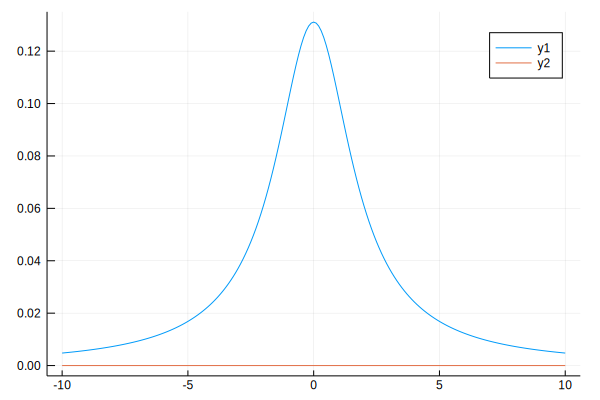

In [10]:
λ = 1.0
û = π/a*Fun(s -> exp(-a*abs(s))*(γ^2 + s^2)/(λ*(γ^2 + s^2) + 2γ), Γ)

u = Fun(x -> fourier(û, x), Γ)/(2π)

plot(-10.0:0.1:10.0, u)

In [11]:
λ*u(0.0) +  sum(u*K) - f(0.0)

1.894040480010517e-13 + 6.805472279452433e-19im

In [16]:
x =2.0

λ*u(x) +  sum(Fun(t -> K(x-t)*u(t), UnionDomain(-Inf .. x, x .. Inf))) - f(x)

2.3935020632137594e-12 + 1.5832361733373612e-15im

Working out the analytic formula for this example takes a lot more work and involves other special functions, and is outside the scope of the course.